## Implementing gradient descent algorithm

Here we seek to understand the underlying dynamic of Gradient descent algorithm.

We shall start by building this algorithm, evaluating the impact of different learning rates on the gradient descent algorithm, and then go ahead to make predictions using this algorithm.

In [97]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt

In [98]:
# Setting random seed for reproducibility
set_seed = 42
np.random.seed(set_seed)

# Defining the function f(x) = x^2 - 4x + 4
def f(x):
    return x**2 - 4 * x + 4

# Defining the derivative of f(x)
def df(x):
    return 2 * x - 4

# Gradient descent algorithm implementation as a function
def gradient_descent(f, df, x_init, alpha, epsilon, max_iters=1000):
    x = x_init
    iter_count = 0
    rel_change = float('inf')
    history = []

    while abs(rel_change) > epsilon and iter_count < max_iters:
        prev_x = x
        fx = f(x)
        gradient = df(x)
        x = x - alpha * gradient
        rel_change = (x - prev_x) / prev_x
        history.append((x, f(x)))
        iter_count += 1

    return x, history

Minimum value of f(x) is: 9.417846946746522e-09 at x = 2.0000970455901914
Minimum value of f(x) is: 5.871392261269648e-11 at x = 2.0000076624777043
Minimum value of f(x) is: 0.0 at x = 2.0
Minimum value of f(x) is: 2.815525590449397e-13 at x = 1.9999994694225927


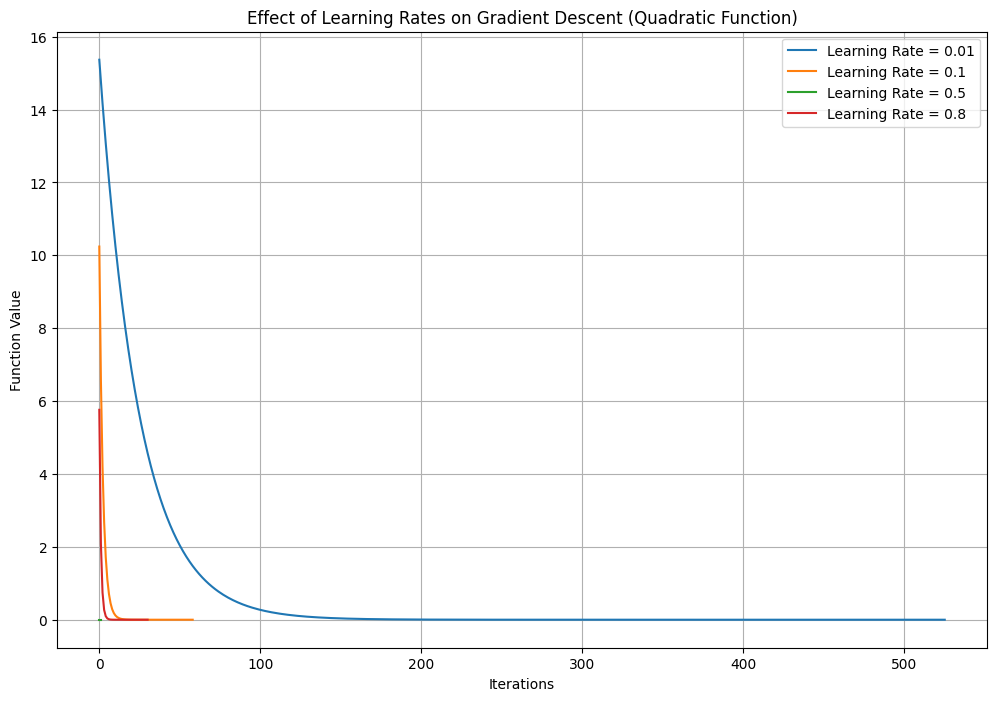

In [99]:
# Using different learning rates with this algorithm  and plotting the results
x_init = 6 # Initial guess
epsilon = 1e-6 # convergence criteria
max_iters = 1000 # number of iterations

learning_rates = [0.01, 0.1, 0.5, 0.8]  #list of learning rates
histories = {}

for alpha in learning_rates:
    final_x, history = gradient_descent(f, df, x_init, alpha, epsilon, max_iters)
    histories[alpha] = history
    print(f"Minimum value of f(x) is: {f(final_x)} at x = {final_x}")

# Plotting the results
plt.figure(figsize=(12, 8))
for alpha, history in histories.items():
    plt.plot([h[1] for h in history], label=f'Learning Rate = {alpha}')

plt.title('Effect of Learning Rates on Gradient Descent (Quadratic Function)')
plt.xlabel('Iterations')
plt.ylabel('Function Value')
plt.legend()
plt.grid(True)
plt.show()

##### Observations

- Learning Rate = 0.01
 The blue line shows a gradual and steady descent towards the minimum function value. It converges slowly but reliably.

- Learning Rate = 0.1
 The orange line also converges to the minimum but at a faster rate than the learning rate of 0.01.

- Learning Rate = 0.5 
The green line exhibits oscillatory behavior around the minimum. This indicates that the learning rate is too high, causing the algorithm to overshoot the optimal solution.

- Learning Rate = 0.8
The red line shows even more pronounced oscillations and fails to converge, confirming that the learning rate is significantly too high.


##### Results:
For this function, the plot demonstrates the impact of learning rate on the performance of gradient descent. A learning rate that is too small (0.01) leads to slow convergence, while a learning rate that is too large (0.5 and 0.8) can result in oscillations or divergence. The learning rate of 0.1 appears to be a good balance between convergence speed and stability for this particular function.

### Testing this Algorithm on a Dataset



Let us start by creating a synthetic data where the target variable <i>y</i> is a function of <i>x</i>.

Here, we will use our target function <i>f(x) = (x<sup>2</sup> - 4x + 4)</i> for simplicity.

In [100]:
# Defining the function
def f(x):
    return x**2 - 4 * x + 4

# Generating synthetic data while making y a function of x
np.random.seed(42)
X_data = np.linspace(-20, 15, 100) # 100 data points between -20 and 15
y_data = f(X_data) + np.random.normal(0, 0.1, X_data.shape)

# Normalizing  the data
X_data = (X_data - np.mean(X_data)) / np.std(X_data)
y_data = (y_data - np.mean(y_data)) / np.std(y_data)


In [101]:
X_data #printing the dataset

array([-1.71481604, -1.68017329, -1.64553055, -1.6108878 , -1.57624505,
       -1.5416023 , -1.50695955, -1.4723168 , -1.43767406, -1.40303131,
       -1.36838856, -1.33374581, -1.29910306, -1.26446031, -1.22981757,
       -1.19517482, -1.16053207, -1.12588932, -1.09124657, -1.05660382,
       -1.02196108, -0.98731833, -0.95267558, -0.91803283, -0.88339008,
       -0.84874733, -0.81410459, -0.77946184, -0.74481909, -0.71017634,
       -0.67553359, -0.64089084, -0.6062481 , -0.57160535, -0.5369626 ,
       -0.50231985, -0.4676771 , -0.43303435, -0.39839161, -0.36374886,
       -0.32910611, -0.29446336, -0.25982061, -0.22517786, -0.19053512,
       -0.15589237, -0.12124962, -0.08660687, -0.05196412, -0.01732137,
        0.01732137,  0.05196412,  0.08660687,  0.12124962,  0.15589237,
        0.19053512,  0.22517786,  0.25982061,  0.29446336,  0.32910611,
        0.36374886,  0.39839161,  0.43303435,  0.4676771 ,  0.50231985,
        0.5369626 ,  0.57160535,  0.6062481 ,  0.64089084,  0.67

In [102]:
y_data #printing the dataset

array([ 2.74957475,  2.63112519,  2.51567293,  2.40220001,  2.28862558,
        2.17830552,  2.07128274,  1.9641641 ,  1.85863147,  1.75672913,
        1.65519507,  1.55633931,  1.45993735,  1.36325774,  1.27028079,
        1.17995966,  1.0903163 ,  1.00394291,  0.91753161,  0.83358021,
        0.75412548,  0.67308856,  0.59547994,  0.51841729,  0.44507949,
        0.37348066,  0.30232715,  0.2352165 ,  0.16810334,  0.10388377,
        0.04110204, -0.01765566, -0.07780473, -0.13541471, -0.18887797,
       -0.24342978, -0.29341545, -0.3442409 , -0.39101477, -0.43519452,
       -0.47821507, -0.5201722 , -0.5600042 , -0.59784754, -0.63453821,
       -0.66783775, -0.69960812, -0.72850532, -0.75719728, -0.78504327,
       -0.80777217, -0.83072777, -0.85145333, -0.86905964, -0.88541949,
       -0.90026513, -0.91447704, -0.92501924, -0.93356597, -0.94019877,
       -0.94652522, -0.94960415, -0.95170031, -0.95125031, -0.94728495,
       -0.94252856, -0.93736869, -0.92838369, -0.91880064, -0.90


Since it is a regression, we will use a common loss function, named the Mean Squared Error (MSE) with the aim of minimizing the value of this loss function using our Gradient descent Algorithm.

$\displaystyle \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_{\text{pred},i} - y_{\text{true},i})^2$

<p>Next, let us define a polynomial regression model of order 2 since our function is a polynomial of order 2. The equation for this regression is given as:</p>

<p>
  <math xmlns="http://www.w3.org/1998/Math/MathML">
    <mrow>
      <msub>
        <mi>y</mi>
        <mtext>pred</mtext>
      </msub>
      <mo>=</mo>
      <msub>
        <mi>w</mi>
        <mn>0</mn>
      </msub>
      <mo>+</mo>
      <msub>
        <mi>w</mi>
        <mn>1</mn>
      </msub>
      <mo>&#8290;</mo>
      <mi>x</mi>
      <mo>+</mo>
      <msub>
        <mi>w</mi>
        <mn>2</mn>
      </msub>
      <mo>&#8290;</mo>
      <msup>
        <mi>x</mi>
        <mn>2</mn>
      </msup>
      <mo>+</mo>
      <mo>&#8230;</mo>
    </mrow>
  </math>
</p>

<p>The gradient descent algorithm will be used to find the optimal weights <msub><mi>w</mi><mn>0</mn></msub> and <msub><mi>w</mi><mn>1</


In [103]:
degree = 2 #degree of our polynomial function


# polynomial features
def predict(X, weights):
    """Predicting the output using a polynomial model with given weights."""
    degree = len(weights) - 1
    y_pred = np.zeros(X.shape)
    for i in range(degree + 1):
        y_pred += weights[i] * (X ** i)
    return y_pred

# Cost function
def cost_function(X, y, weights):
    y_pred = predict(X, weights)
    return np.mean((y_pred - y) ** 2)

# Gradient descent algorithm for polynomial regression
def gradient_descent_poly(X, y, weights_init, alpha, epsilon, max_iters=1000):
    weights = np.array(weights_init)
    iter_count = 0
    cost_history = []

    while iter_count < max_iters:
        y_pred = predict(X, weights)
        error = y_pred - y
        
        gradients = []
        for i in range(degree + 1):
            gradient = np.mean(error * (X ** i))
            gradients.append(gradient)
        
        # Update weights with a smaller learning rate
        weights -= alpha * np.array(gradients)
        
        # Calculate cost and store it
        cost = cost_function(X, y, weights)
        cost_history.append(cost)
        
        # Convergence check
        if len(cost_history) > 1 and abs(cost_history[-2] - cost_history[-1]) < epsilon:
            break
        
        iter_count += 1

    return weights, cost_history

Let us now train the linear regression model using gradient descent and see the performance on our data using different learning rates.

c:\Users\chiso\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\chiso\AppData\Local\Temp\ipykernel_14572\2109561318.py:41: RuntimeWarning: invalid value encountered in scalar subtract
  if len(cost_history) > 1 and abs(cost_history[-2] - cost_history[-1]) < epsilon:
C:\Users\chiso\AppData\Local\Temp\ipykernel_14572\2109561318.py:16: RuntimeWarning: overflow encountered in square
  return np.mean((y_pred - y) ** 2)


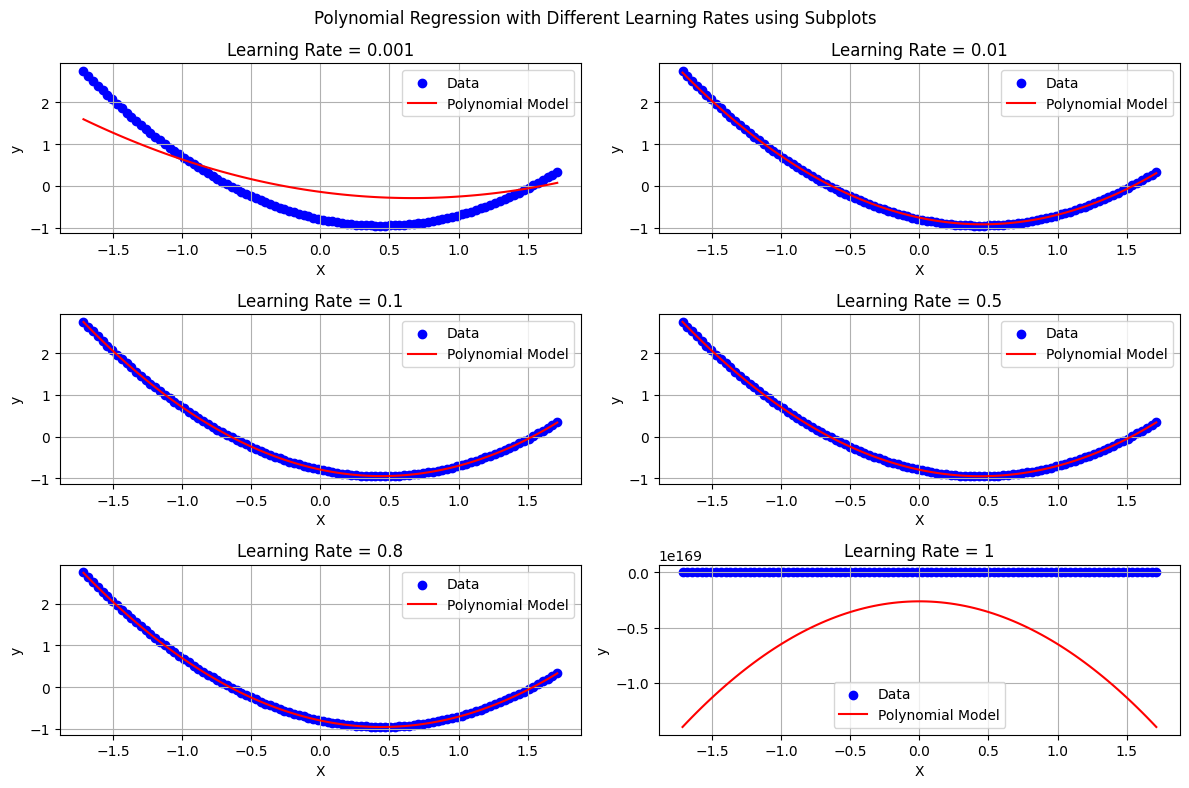

In [104]:
alphas = [0.001, 0.01, 0.1, 0.5, 0.8, 1]  # Experiment with different learning rates
epsilon = 1e-6
weights_init = [0.0] * (degree + 1)

# Create a figure with subplots
rows, cols = 3, 2  # Adjust rows and columns based on the number of learning rates
fig, axes = plt.subplots(rows, cols, figsize=(12, 8))

# Loop through learning rates and perform gradient descent, plotting results
for i, alpha in enumerate(alphas):
    row = i // cols
    col = i % cols
    
    weights, cost_history = gradient_descent_poly(X_data, y_data, weights_init.copy(), alpha, epsilon)
    y_pred = predict(X_data, weights)

    axes[row, col].scatter(X_data, y_data, label='Data', color='blue')
    axes[row, col].plot(X_data, y_pred, label='Polynomial Model', color='red')
    axes[row, col].set_title(f'Learning Rate = {alpha}')
    axes[row, col].set_xlabel('X')
    axes[row, col].set_ylabel('y')
    axes[row, col].legend()
    axes[row, col].grid(True)

# Adjust layout (optional)
fig.suptitle('Polynomial Regression with Different Learning Rates using Subplots')
plt.tight_layout()
plt.show()

##### Observation

The plot indicates how the polynomial model tries to capture the general trend of the data. The curve fits is seen to be significantly affected by the learning rates

- The curve fits reasonably well to the overall shape of the data with learning rates 0.01, 0.1, 0.5, and 0.8. 


- Learning rates 0.001 and 1 do not fit the shape of the data.

- It is also important to note that some of the learning rates seen to fit the data reasonably well e.g learning rate 0.5, might be over fitting the data due to high learning rate leading to divergence.

##### SUGGESTIONS

To improve the performance, we can consider:
- Regularization: Introducing regularization techniques (like L1 or L2 regularization) can help us prevent overfitting by penalizing complex models.

- Different Optimization Algorithm: While gradient descent is a common choice, other optimization algorithms (e.g., Adam, RMSprop) might converge faster or to a better solution for this specific problem.

##### Conclusion

In general, we have been able to investigate the impact of learning rate on Convergence for the Gradient descent optimization algorithm. This performance may vary for different functions and more work needs to be done to achieve a more stable learning rate that can be applied to ifferent types of problems in real life. We also see that choosing an appropriate learning rate is crucial for the success of gradient descent algorithms.
A learning rate that is too high can hinder convergence or even cause the algorithm to diverge.
A learning rate that is too low can lead to slow convergence.
Since the plots in this work illustrates the effect of learning rates on a simple quadratic function, it's important to note that the optimal learning rate can vary depending on the complexity of the function and the dataset. In practice, techniques like learning rate scheduling or adaptive learning rate methods can be employed to improve convergence.